# Welcome to ProgModel's ProgPy Noise Tutorial!

In this example we are going to demonstrate approaches for adding and handling model __noise__ . We will use the same model as in the [INSERT LINK TO IPYNB OR PATH](first.ipynb), but we will add __noise__  to the model's output! 

Before we begin, let's discuss what __noise__ is! __Noise__  in the Prognostics Setting generally refers to the unpredictable or random error that is present in sensor readings, system data, or predictive models. __Noise__  can be caused by a variety of factors, including sensor error, environmental factors, and even human error. __Noise__  can be a major problem in prognostics, as it can cause a model to make incorrect predictions. In this tutorial, we will demonstrate how to add __noise__  to a model, and how to handle __noise__  in a model's output!

In ProgPy, we have three types of defined __noises__: [process noise](https://nasa.github.io/progpy/glossary.html#term-process-noise), [measurement noise](https://nasa.github.io/progpy/glossary.html#term-measurement-noise), and [future loading noise](https://nasa.github.io/progpy/glossary.html#term-future-loading-noise).

With our definition of __noise__, when we state that we are adding '1 __noise__' to the system, that means we are adding a level of uncertainty to the states of the system. 

+-1 for uniform

guassian, 
normal, +- 1 .68% for normal for 1 sd

This is done by adding a random number to the state of the system. The random number is generated from a normal distribution with a mean of 0 and a standard deviation of 1. Furthermore, the type of distribution that our __noise__ is generated from can be changed by the user e.g. normal, uniform, triangular.

Note that adding '1 __noise__' to one system will not proportionally change said system in the same way that the added __noise__ would affect another system. How __noise__ affects the system is entirely dependent on how the system!

First, we are going to define some helper functions for plotting and generating data and a configuration for simulation.


Remove unncesssary information from print_results. Only show Graph

In [1]:
def future_load(t=None, x=None):  
    # The thrown object model has no inputs- you cannot load the system (i.e., affect it once it's in the air)
    # So we return an empty input container
    return m.InputContainer({})

# Define configuration for simulation
config = {
    'threshold_keys': 'impact', # Simulate until the thrown object has impacted the ground
    'dt': 0.005, # Time step (s)
    'save_freq': 0.5, # Frequency at which results are saved (s)
}

# Define a function to print the results - will be used later
def print_results(simulated_results):
    # Print results
    print('states:')
    for (t,x) in zip(simulated_results.times, simulated_results.states):
        print('\t{:.2f}s: {}'.format(t, x))

    print('outputs:')
    for (t,x) in zip(simulated_results.times, simulated_results.outputs):
        print('\t{:.2f}s: {}'.format(t, x))

    print('\nimpact time: {:.2f}s'.format(simulated_results.times[-1]))
    # The simulation stopped at impact, so the last element of times is the impact time

    # Plot results
    simulated_results.states.plot()

### Example 1) No __Noise__

In our first example, we are going to demonstrate how to explicitly define a model with no __noise__ !

First, we are going to need to import the necessary packages. We will need the `Model` class from `ProgModel`, the `numpy` package, and the `matplotlib.pyplot` package.

Furthermore, we will import warnings to suppress warnings that may be generated by the `ProgModel` package. This is not necessary, but it will make our output look more readable!

In [2]:
import matplotlib.pyplot as plt
import warnings
from prog_models.models import ThrownObject, BatteryElectroChemEOD

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

Now, let's instantiate the model and simulate some results!

states:
	0.00s: {'x': 1.83, 'v': 40.0}
	0.50s: {'x': 20.35092591060207, 'v': 34.07855124289541}
	1.00s: {'x': 36.12822744263126, 'v': 28.393737692901528}
	1.50s: {'x': 48.9812214219364, 'v': 22.99846684410669}
	2.00s: {'x': 59.18332628263409, 'v': 17.784029484245163}
	2.50s: {'x': 66.81357749367159, 'v': 12.705288070826589}
	3.00s: {'x': 71.92955924357045, 'v': 7.721366562656726}
	3.50s: {'x': 74.56918342157253, 'v': 2.794268972436784}
	4.00s: {'x': 74.75187498447991, 'v': -2.1113986020335997}
	4.50s: {'x': 72.51970359869338, 'v': -6.951038077083324}
	5.00s: {'x': 67.84376796132159, 'v': -11.78994457815374}
	5.50s: {'x': 60.767651534582804, 'v': -16.545494944171786}
	6.00s: {'x': 51.34088892233225, 'v': -21.18640641142484}
	6.50s: {'x': 39.62791879000095, 'v': -25.684491985662305}
	7.00s: {'x': 25.706379318441126, 'v': -30.015262094408577}
	7.50s: {'x': 9.665150243939953, 'v': -34.158332454780265}
	7.78s: {'x': -0.02584293949765626, 'v': -36.35101411864478}
outputs:
	0.00s: {'x': 1.83}

/Users/aditummala/Desktop/prog_models/src/prog_models/exceptions.py:20: UserWarning: Behavior of SimResult.plot() will change with version 1.6. New behavior will match that of a pandas data frame.
  warn(msg, *args, **kwargs)


Text(0.5, 1.0, 'Ex1: No noise')

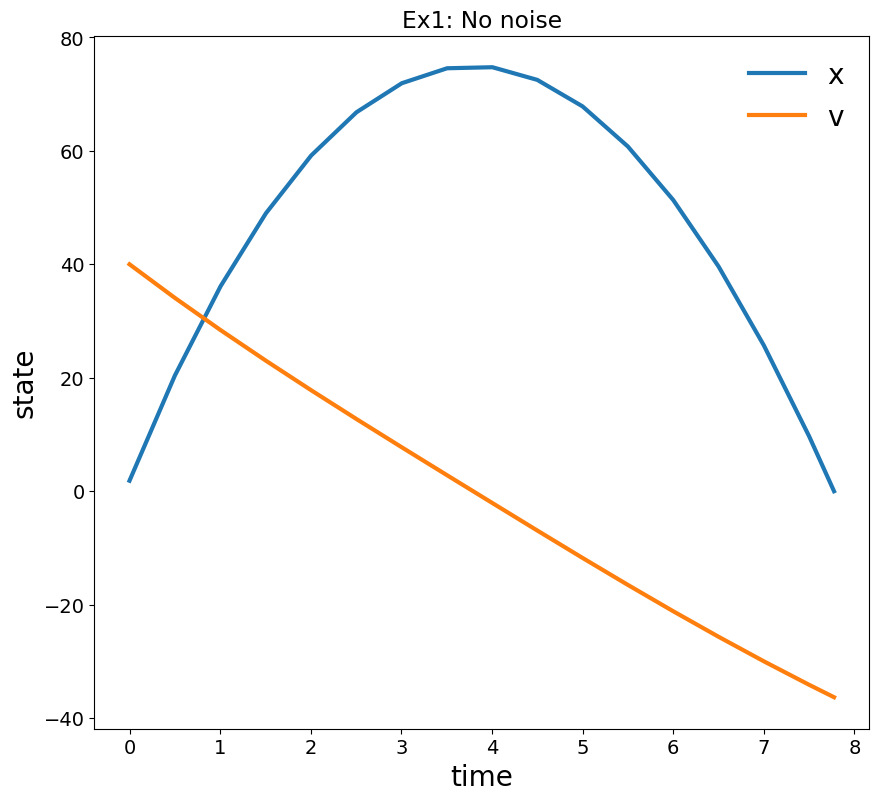

In [3]:
m = ThrownObject(process_noise = False)
simulated_results = m.simulate_to_threshold(future_load, **config)
print_results(simulated_results)
plt.title('Ex1: No noise')

`Note`: Notice that that the model's output is deterministic with respect to time. This is because we have not added any __noise__  to the model!

### Example 2) With __Noise__ - same __noise__ applied to every state

Now, we'll demonstrate how we can apply __noise__  to every state!

states:
	0.00s: {'x': 1.83, 'v': 40.0}
	0.50s: {'x': 19.609966906753197, 'v': 33.74849207846158}
	1.00s: {'x': 36.07808294396787, 'v': 26.90274899083322}
	1.50s: {'x': 48.67961812058528, 'v': 20.93910296826378}
	2.00s: {'x': 57.119839988122855, 'v': 15.391269395723723}
	2.50s: {'x': 63.777913000931584, 'v': 10.24239395535024}
	3.00s: {'x': 67.62409341695172, 'v': 4.745196068612079}
	3.50s: {'x': 68.64060621937243, 'v': 0.6641488673802556}
	4.00s: {'x': 66.6362192488819, 'v': -4.680866059077733}
	4.50s: {'x': 62.779816943053554, 'v': -9.22499357678154}
	5.00s: {'x': 57.75985125457785, 'v': -12.790211307239055}
	5.50s: {'x': 49.73255744464415, 'v': -17.652042744821145}
	6.00s: {'x': 40.104391371666345, 'v': -21.57988386649752}
	6.50s: {'x': 28.845720635378022, 'v': -27.69375905200985}
	7.00s: {'x': 13.557384903231123, 'v': -32.231218606602035}
	7.40s: {'x': -0.021603763178772495, 'v': -35.71201479216345}
outputs:
	0.00s: {'x': 1.83}
	0.50s: {'x': 19.609966906753197}
	1.00s: {'x': 36.0780

Text(0.5, 1.0, 'Ex2: Basic Noise')

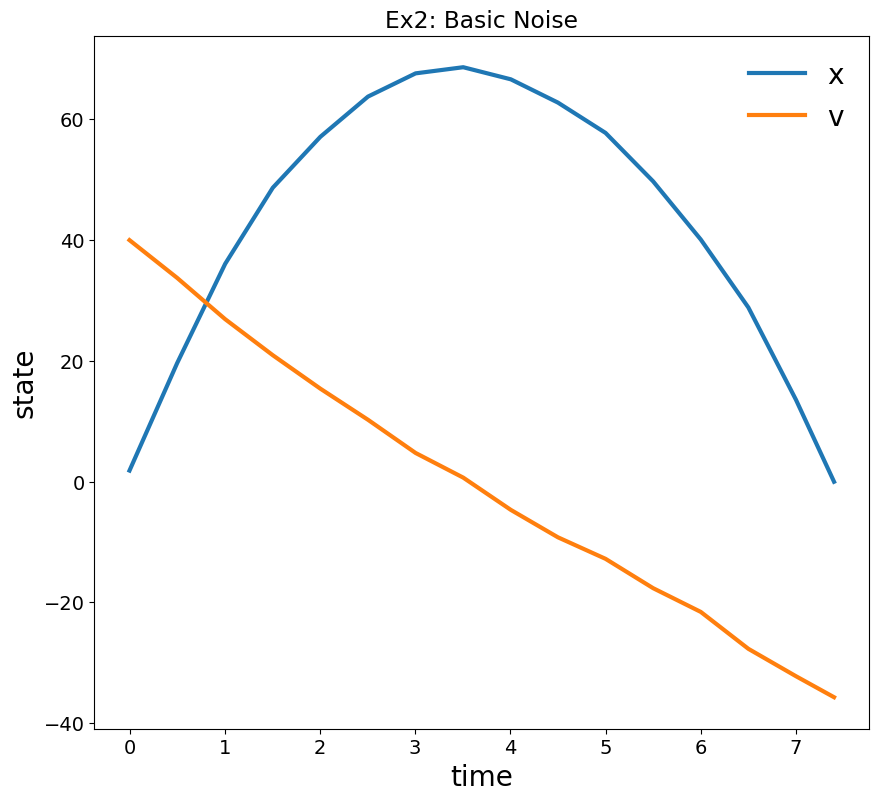

In [4]:
process_noise = 15
m = ThrownObject(process_noise = process_noise)  # Noise with a std of 0.5 to every state
simulated_results = m.simulate_to_threshold(future_load, **config)
print_results(simulated_results)
plt.title('Ex2: Basic Noise')

`Note`: In contrast to example 1, note that this graph is no longer deterministic with respect to time. Instead, we have some 'jaggedness' in the graph. This is because we have added __noise__  to the model!

### Example 3) __Noise__ - more __noise__  on position than velocity

In the previous example we added the same __noise__  to every state. In this example, we are adding a unique __noise__  to each state! Here we are adding 30 __noise__  to the position and 1 __noise__  to velocity!

states:
	0.00s: {'x': 1.83, 'v': 40.0}
	0.50s: {'x': 19.06462207535743, 'v': 34.12058753492438}
	1.00s: {'x': 36.14515617427779, 'v': 28.42958828489472}
	1.50s: {'x': 47.67509255973384, 'v': 23.103504219278594}
	2.00s: {'x': 59.516909267181504, 'v': 17.908657448431907}
	2.50s: {'x': 66.23236858005926, 'v': 12.901874335858027}
	3.00s: {'x': 70.88409237848964, 'v': 7.976019927850364}
	3.50s: {'x': 73.69735664519831, 'v': 3.0010712660788523}
	4.00s: {'x': 77.04431987110198, 'v': -1.932505640053364}
	4.50s: {'x': 72.07146241065745, 'v': -6.785682980759869}
	5.00s: {'x': 66.36688112525532, 'v': -11.595108547937013}
	5.50s: {'x': 61.04959417305629, 'v': -16.253019158628334}
	6.00s: {'x': 51.578756419080214, 'v': -20.945277396297197}
	6.50s: {'x': 39.24821514120477, 'v': -25.49747937774455}
	7.00s: {'x': 21.821347975679757, 'v': -29.852023892332205}
	7.50s: {'x': 5.488695709766801, 'v': -33.97596975181992}
	7.66s: {'x': -0.033230800143126876, 'v': -35.18199035074376}
outputs:
	0.00s: {'x': 1.

Text(0.5, 1.0, 'Ex3: More noise on position')

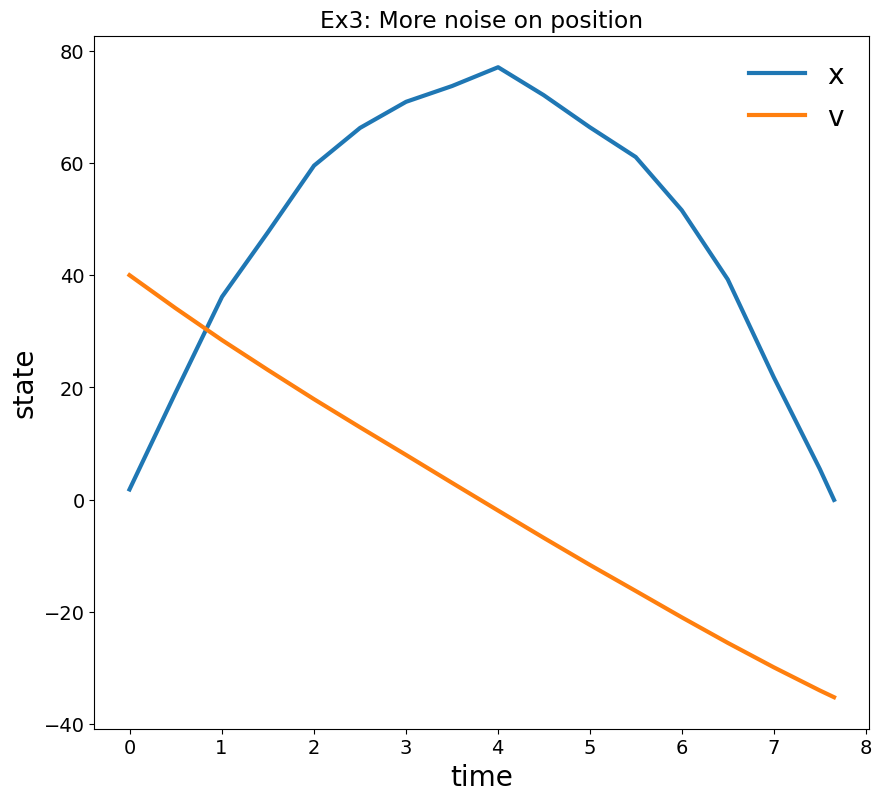

In [5]:
process_noise = {'x': 30, 'v': 1}
m = ThrownObject(process_noise = process_noise) 
simulated_results = m.simulate_to_threshold(future_load, **config)
print_results(simulated_results)
plt.title('Ex3: More noise on position')

`Note`: The position is much more 'jagged' than the velocity. This is because we added more __noise__  to the position than the velocity! In other words, the results of the simulated data depict that determining the position of the thrown object is less deterministic than the velocity of the thrown object!

### Example 4) __Noise__ - Different Distributions

In this example, we are going to demonstrate how we can change the distribution of the __noise__  that we add to the model! In the previous example, we added __noise__  to the model from a normal distribution. In this example, we are going to add __noise__  from a uniform distribution!

For the sake of demonstrating the differences between distributions of __noise__ , we will use a more complicated model!


Example with triangular process noise
states:
	0.00s: {'tb': 292.1, 'Vo': 0.0, 'Vsn': 0.0, 'Vsp': 0.0, 'qnB': 6840.0, 'qnS': 760.0, 'qpB': 4560.000000000001, 'qpS': 506.6666666666668}
	200.00s: {'tb': 246.30912724771173, 'Vo': 19.912318405233425, 'Vsn': 0.01293742424439718, 'Vsp': 0.0011414296775820937, 'qnB': 6502.679998510188, 'qnS': 697.3200014898138, 'qpB': 4897.320001489813, 'qpS': 569.3466651768532}
	400.00s: {'tb': 375.6407730877147, 'Vo': -11.206643209081168, 'Vsn': 0.02398309973180848, 'Vsp': 0.0015164996183801792, 'qnB': 6142.679999999997, 'qnS': 657.3200000000004, 'qpB': 5257.320000000008, 'qpS': 609.3466666666669}
	600.00s: {'tb': 152.84638985166936, 'Vo': -33.22627006789852, 'Vsn': 0.03579896996560079, 'Vsp': 0.0012007667110666058, 'qnB': 5782.67999999996, 'qnS': 617.3199999999955, 'qpB': 5617.320000000044, 'qpS': 649.3466666666718}
	800.00s: {'tb': 8.040103607686827, 'Vo': -11.05918876710513, 'Vsn': 0.031235177095428068, 'Vsp': 0.00014326958351286377, 'qnB': 5591.3400007

/Users/aditummala/Desktop/prog_models/src/prog_models/prognostics_model.py:421: ProgModelStateLimitWarning: State tb limited to 0 (was -6.438950895039909)
  warn("State {} limited to {} (was {})".format(key, limit[0], x[key]), ProgModelStateLimitWarning)
/Users/aditummala/Desktop/prog_models/src/prog_models/prognostics_model.py:421: ProgModelStateLimitWarning: State tb limited to 0 (was -9.123295573716797)
  warn("State {} limited to {} (was {})".format(key, limit[0], x[key]), ProgModelStateLimitWarning)
/Users/aditummala/Desktop/prog_models/src/prog_models/prognostics_model.py:421: ProgModelStateLimitWarning: State tb limited to 0 (was -2.6188023672202547)
  warn("State {} limited to {} (was {})".format(key, limit[0], x[key]), ProgModelStateLimitWarning)
/Users/aditummala/Desktop/prog_models/src/prog_models/prognostics_model.py:421: ProgModelStateLimitWarning: State tb limited to 0 (was -18.107097249996386)
  warn("State {} limited to {} (was {})".format(key, limit[0], x[key]), ProgMo

Text(0.5, 1.0, 'Ex4: Ex3 with uniform dist')

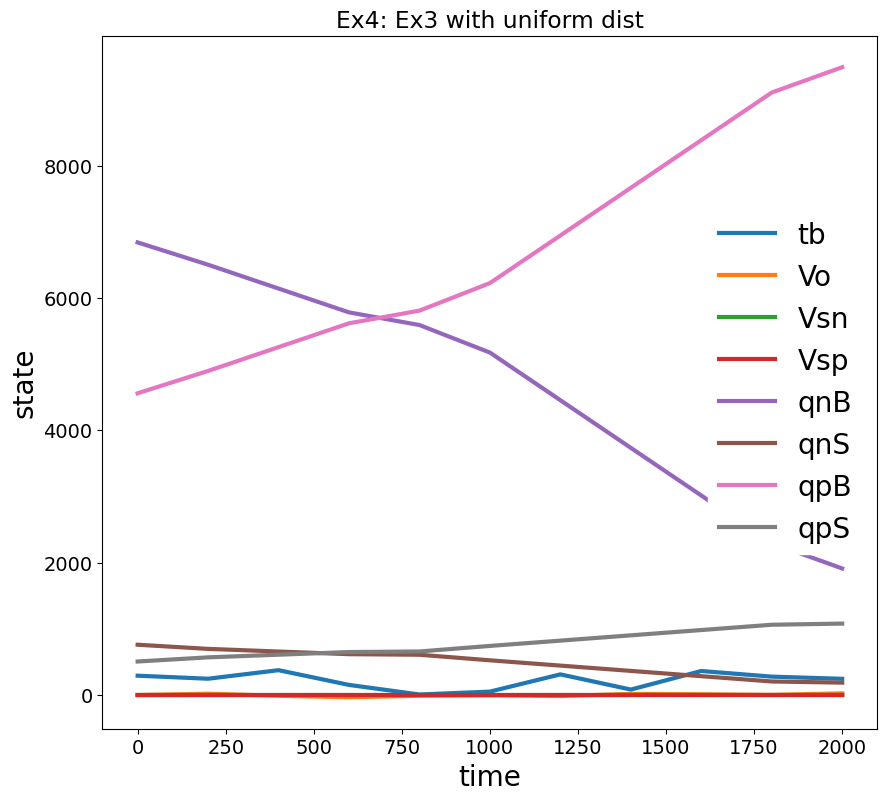

In [11]:
process_noise_dist = 'uniform'
# process_noise = {'tb': 30, 'Vo': 15}

model_config = {'process_noise_dist': process_noise_dist, 'process_noise': process_noise}
m = BatteryElectroChemEOD(**model_config)

options = {
    'save_freq': 200, # Frequency at which results are saved
    'dt': 1, # Time step
}

def future_loading_BATT(t, x=None):
    if (t < 600):
        i = 2
    elif (t < 900):
        i = 1
    elif (t < 1800):
        i = 4
    elif (t < 3000):
        i = 2
    else:
        i = 3
    return m.InputContainer({'i': i})

simulated_results = m.simulate_to(2000, future_loading_BATT, **options)
print('\nExample with triangular process noise')
print_results(simulated_results)
plt.title('Ex4: Ex3 with uniform dist')

#### Now, let's try with triangular distribution.

define very small non-zero values for the process_noises, and state that if you do not pass in values to all the process_noises, we'll receive an error.


Instead of using states, use the outputs of the model.

SHowing one useful state, VNS, overlay with noise and without noise. 

Difference between pn and mn.


Creating a pull request: Either reducing the Matrix to another Matrix such taht the triangular method can atake it or 


        m = SomeModel(process_noise_dist='triangular')
        m.parameters['process_noise'] = {'a': 15, ...}
        m.parameters['process_noise_dist'] = 'uniform'



In [10]:
process_noise_dist = 'triangular'
# process_noise = {'tb': 30, 'Vo': 15}
model_config = {'process_noise_dist': process_noise_dist, 'process_noise': process_noise}
m = BatteryElectroChemEOD(**model_config)

options = {
    'save_freq': 200, # Frequency at which results are saved
    'dt': 1, # Time step
}

def future_loading_BATT(t, x=None):
    if (t < 600):
        i = 2
    elif (t < 900):
        i = 1
    elif (t < 1800):
        i = 4
    elif (t < 3000):
        i = 2
    else:
        i = 3
    return m.InputContainer({'i': i})

simulated_results = m.simulate_to(2000, future_loading_BATT, **options)
print('\nExample with triangular process noise')
print_results(simulated_results)
plt.title('Ex4: Ex3 with triangular dist')

ValueError: left == right

Note that there are some similarities and differences between the graphs! The triangular distribution is similar to the uniform distribution, but it is more likely to generate values closer to the mean of the distribution. This is why the triangular distribution is more 'jagged' than the uniform distribution!

### Example 5) Measurement noise

Everything we've done with process noise, we can also do with measurement noise. Just use 'measurement_noise' and 'measurement_noise_dist' 



** SHOWING output overtime instead of the states for measurment. Showing the states to show that measurment noise does not affect the states overtime.


Example with measurement noise
- Note: outputs are different than state- this is the application of measurement noise
states:
	0.00s: {'x': 1.83, 'v': 40.0}
	0.50s: {'x': 20.35092591060207, 'v': 34.07855124289541}
	1.00s: {'x': 36.12822744263126, 'v': 28.393737692901528}
	1.50s: {'x': 48.9812214219364, 'v': 22.99846684410669}
	2.00s: {'x': 59.18332628263409, 'v': 17.784029484245163}
	2.50s: {'x': 66.81357749367159, 'v': 12.705288070826589}
	3.00s: {'x': 71.92955924357045, 'v': 7.721366562656726}
	3.50s: {'x': 74.56918342157253, 'v': 2.794268972436784}
	4.00s: {'x': 74.75187498447991, 'v': -2.1113986020335997}
	4.50s: {'x': 72.51970359869338, 'v': -6.951038077083324}
	5.00s: {'x': 67.84376796132159, 'v': -11.78994457815374}
	5.50s: {'x': 60.767651534582804, 'v': -16.545494944171786}
	6.00s: {'x': 51.34088892233225, 'v': -21.18640641142484}
	6.50s: {'x': 39.62791879000095, 'v': -25.684491985662305}
	7.00s: {'x': 25.706379318441126, 'v': -30.015262094408577}
	7.50s: {'x': 9.6651502439399

Text(0.5, 1.0, 'Ex6: Measurement noise')

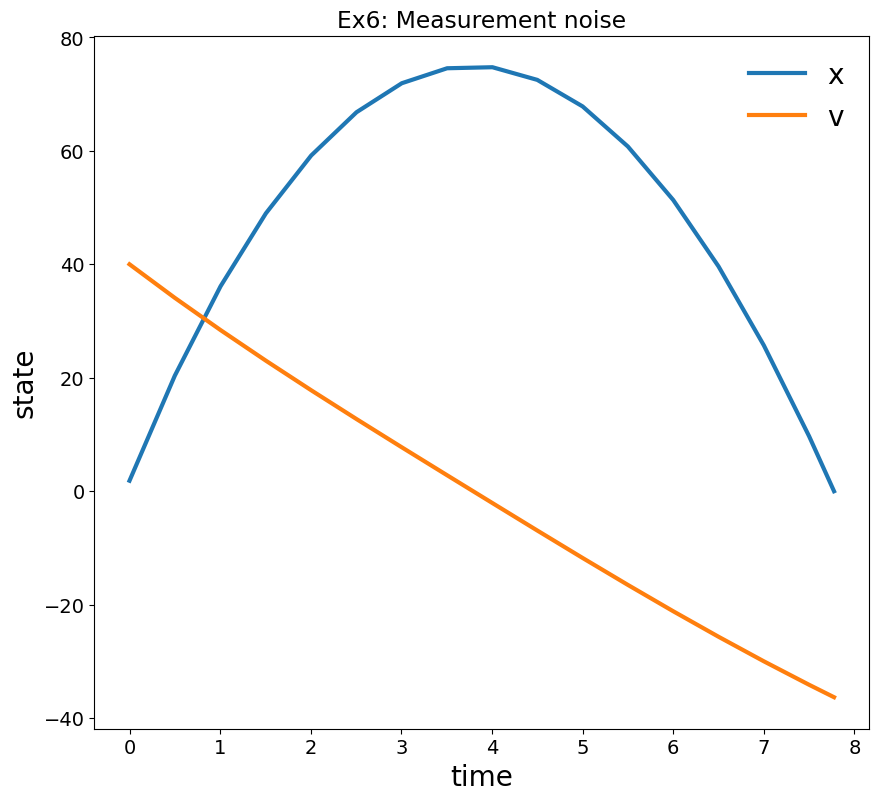

In [ ]:
measurement_noise = {'x': 20}  # For each output
measurement_noise_dist = 'uniform'
model_config = {'measurement_noise_dist': measurement_noise_dist, 'measurement_noise': measurement_noise}
m = ThrownObject(**model_config) 
print('\nExample with measurement noise')
print('- Note: outputs are different than state- this is the application of measurement noise')
simulated_results = m.simulate_to_threshold(future_load, **config)
print_results(simulated_results)
plt.title('Ex6: Measurement noise')

### Example 6) Proportional noise on V only

OK, now for something a little more complicated. Let's try proportional noise on v only (more variation when it's going faster). This can be used to do custom or more complex noise distributions


Example with proportional noise on velocity
states:
	0.00s: {'x': 1.83, 'v': 40.0}
	0.50s: {'x': 18.219146980802943, 'v': 26.108573696098322}
	1.00s: {'x': 28.65747626744562, 'v': 15.622722129504576}
	1.50s: {'x': 34.43048924652521, 'v': 7.741357308039583}
	2.00s: {'x': 36.73562461535334, 'v': 1.6781180658965122}
	2.50s: {'x': 36.36109128913896, 'v': -3.026043760339709}
	3.00s: {'x': 33.906398898723836, 'v': -6.672844310084536}
	3.50s: {'x': 29.843307749242015, 'v': -9.484857093610815}
	4.00s: {'x': 24.54257629159594, 'v': -11.644067509790752}
	4.50s: {'x': 18.359450644549458, 'v': -13.282249671421319}
	5.00s: {'x': 11.390937950524583, 'v': -14.547403898997567}
	5.50s: {'x': 3.867683731751455, 'v': -15.511517052100352}
	5.75s: {'x': -0.05931819728642461, 'v': -15.903409467314532}
outputs:
	0.00s: {'x': 1.83}
	0.50s: {'x': 18.219146980802943}
	1.00s: {'x': 28.65747626744562}
	1.50s: {'x': 34.43048924652521}
	2.00s: {'x': 36.73562461535334}
	2.50s: {'x': 36.36109128913896}
	3.00s: {'x':

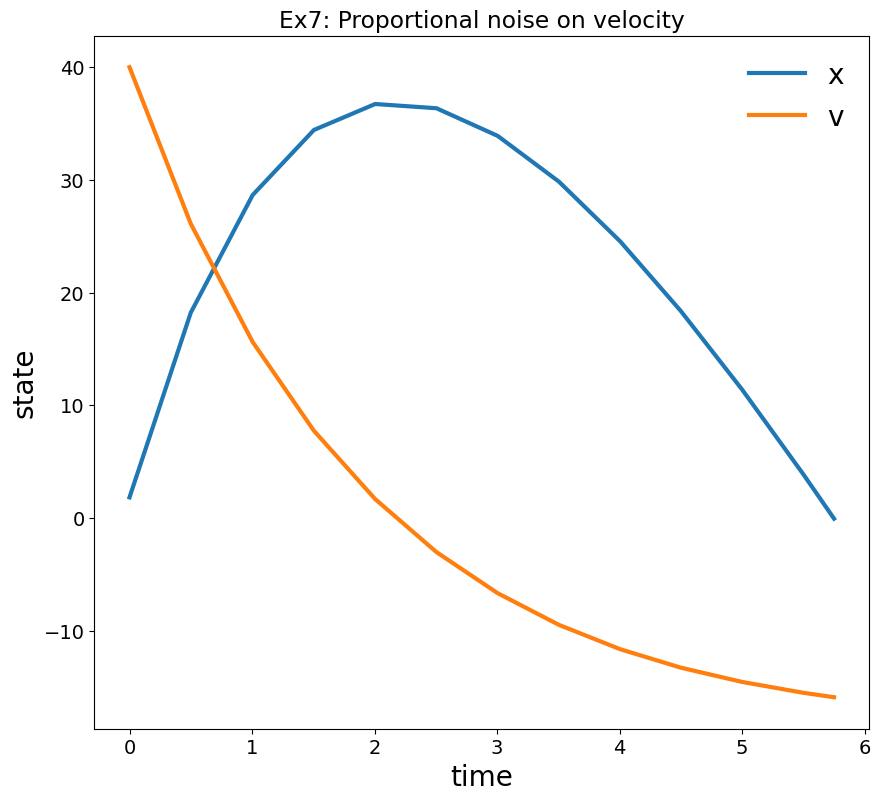

In [37]:
def apply_proportional_process_noise(self, x, dt = 1):
    x['v'] -= dt*0.5*x['v']
    return x
model_config = {'process_noise': apply_proportional_process_noise}
m = ThrownObject(**model_config)
print('\nExample with proportional noise on velocity')
simulated_results = m.simulate_to_threshold(future_load, **config)
print_results(simulated_results)
plt.title('Ex7: Proportional noise on velocity')

print('\nNote: If you would like noise to be applied in a repeatable manner, set the numpy random seed to a fixed value')
print('e.g., numpy.random.seed(42)')
plt.show()

Note that the velocity here is decaying at a exponential rate, since it is proportional.

As seen from these examples, there are many ways of adding __noise__  to a model!